In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score,roc_curve,auc  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression as LR   
import time
import math  
import toad

/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 查看数据

In [2]:
data = pd.read_csv('./Acard.txt')
data.head()

,obs_mth,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info
0,2018-10-31,0.0,A10000005,0.675349,0.144072,0.186899,0.483640,0.928328,0.369644,-0.322581,0.023810,0.00,0.217949
1,2018-07-31,0.0,A1000002,0.825269,0.398688,0.139396,0.843725,0.605194,0.406122,-0.128677,0.023810,0.00,0.423077
2,2018-09-30,0.0,A1000011,0.315406,0.629745,0.535854,0.197392,0.614416,0.320731,0.062660,0.023810,0.10,0.448718
3,2018-07-31,0.0,A10000481,0.002386,0.609360,0.366081,0.342243,0.870006,0.288692,0.078853,0.071429,0.05,0.179487
4,2018-07-31,0.0,A1000069,0.406310,0.405352,0.783015,0.563953,0.715454,0.512554,-0.261014,0.023810,0.00,0.423077


In [3]:
#使用toad包查看数据
toad.detector.detect(data)

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
obs_mth,object,95806,0.00%,5,2018-07-31:35.52%,2018-06-30:21.47%,2018-11-30:16.67%,2018-10-31:15.16%,2018-09-30:11.18%,2018-07-31:35.52%,2018-06-30:21.47%,2018-11-30:16.67%,2018-10-31:15.16%,2018-09-30:11.18%
bad_ind,float64,95806,0.00%,2,0.018767,0.135702,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
uid,object,95806,0.00%,95806,A10000005:0.00%,A7627440:0.00%,A7628676:0.00%,A762859:0.00%,A762848:0.00%,A265871:0.00%,A2658235:0.00%,A2657810:0.00%,A2657584:0.00%,Ab99_96436392001380983:0.00%
td_score,float64,95806,0.00%,95806,0.499739,0.288349,0.000005,0.009613,0.099706,0.500719,0.747984,0.900024,0.990041,0.999999
jxl_score,float64,95806,0.00%,95806,0.499338,0.28885,0.000013,0.009947,0.099103,0.499795,0.748646,0.899703,0.989348,0.999985
mj_score,float64,95806,0.00%,95806,0.50164,0.288679,0.000007,0.010508,0.100882,0.503048,0.752032,0.899308,0.990047,0.999993
rh_score,float64,95806,0.00%,95806,0.498407,0.287797,0.000005,0.009916,0.099948,0.497466,0.747188,0.899286,0.989473,0.999986
zzc_score,float64,95806,0.00%,95806,0.500627,0.289067,0.000012,0.010186,0.099011,0.501688,0.750986,0.899924,0.990043,0.999998
zcx_score,float64,95806,0.00%,95806,0.499672,0.289137,0.00001,0.010325,0.099743,0.49913,0.750683,0.901942,0.989712,0.999987
person_info,float64,95806,0.00%,7,-0.078229,0.156859,-0.322581,-0.322581,-0.322581,-0.053718,0.078853,0.078853,0.078853,0.078853


In [7]:
df=data.drop(columns=['obs_mth'])
dev = df[data.obs_mth != '2018-11-30'].copy()
val = df[data.obs_mth == '2018-11-30'].copy()

In [8]:
dev

,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info
0,0.0,A10000005,0.675349,0.144072,0.186899,0.483640,0.928328,0.369644,-0.322581,0.023810,0.00,0.217949
1,0.0,A1000002,0.825269,0.398688,0.139396,0.843725,0.605194,0.406122,-0.128677,0.023810,0.00,0.423077
2,0.0,A1000011,0.315406,0.629745,0.535854,0.197392,0.614416,0.320731,0.062660,0.023810,0.10,0.448718
3,0.0,A10000481,0.002386,0.609360,0.366081,0.342243,0.870006,0.288692,0.078853,0.071429,0.05,0.179487
4,0.0,A1000069,0.406310,0.405352,0.783015,0.563953,0.715454,0.512554,-0.261014,0.023810,0.00,0.423077
...,...,...,...,...,...,...,...,...,...,...,...,...
79826,0.0,Ab99_96436392005147255,0.905578,0.927706,0.994447,0.315842,0.959443,0.042640,0.078853,0.071429,0.13,0.076923
79827,0.0,Ab99_96436392005205003,0.639265,0.219267,0.845014,0.751332,0.275557,0.902642,0.078853,0.023810,0.00,0.076923
79828,0.0,Ab99_96436392005412387,0.355061,0.837747,0.931882,0.442463,0.579277,0.740754,0.078853,0.023810,0.02,0.076923
79829,0.0,Ab99_96436392006241624,0.797237,0.501238,0.490850,0.592068,0.479618,0.859870,0.078853,0.023810,0.00,0.076923


train_ks :  0.4482325608488951
val_ks :  0.4198642457760936


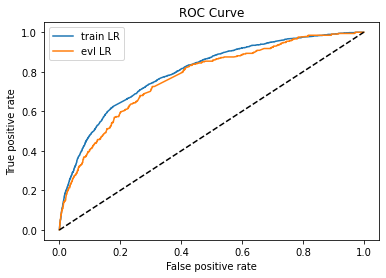

In [5]:
feature_lst = ['person_info','finance_info','credit_info','act_info']

x = train[feature_lst]
y = train['bad_ind']

val_x =  val[feature_lst]
val_y = val['bad_ind']

lr_model = LR(C=0.1,class_weight='balanced')
lr_model.fit(x,y)
y_pred = lr_model.predict_proba(x)[:,1]
fpr_lr_train,tpr_lr_train,_ = roc_curve(y,y_pred)
train_ks = abs(fpr_lr_train - tpr_lr_train).max()
print('train_ks : ',train_ks)

y_pred = lr_model.predict_proba(val_x)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(val_y,y_pred)
val_ks = abs(fpr_lr - tpr_lr).max()
print('val_ks : ',val_ks)
from matplotlib import pyplot as plt
plt.plot(fpr_lr_train,tpr_lr_train,label = 'train LR')
plt.plot(fpr_lr,tpr_lr,label = 'evl LR')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

## 经过特征筛选后

In [3]:
# 指定不参与训练列名  
ex_lis = ['uid', 'bad_ind']  
# 参与训练列名  
ft_lis = list(data_all.columns)  
for i in ex_lis:      
    ft_lis.remove(i) 
    
# 开发样本、验证样本与时间外样本  
dev = data_all[(data_all['samp_type'] == 'dev')]
val = data_all[(data_all['samp_type'] == 'val') ]  
off = data_all[(data_all['samp_type'] == 'off') ]  

数据很干净，无需清洗，下面直接对数据进行特征工程

## 特征工程

In [10]:
# 指定不参与训练列名  
ex_lis = ['uid', 'bad_ind']  

dev_slct1, drop_lst= toad.selection.select(dev, dev['bad_ind'], 
                                                   empty=0.7, iv=0.02, 
                                                   corr=0.7, 
                                                   return_drop=True, 
                                                   exclude=ex_lis)  
print("keep:", dev_slct1.shape[1],  
      "drop empty:", len(drop_lst['empty']), 
      "drop iv:", len(drop_lst['iv']),  
      "drop corr:", len(drop_lst['corr'])) 
print('==='*20)
print(drop_lst)

keep: 11 drop empty: 0 drop iv: 1 drop corr: 0
{'empty': array([], dtype=float64), 'iv': array(['rh_score'], dtype=object), 'corr': array([], dtype=object)}


In [11]:
# 得到切分节点  
combiner = toad.transform.Combiner()  
combiner.fit(dev_slct1, dev_slct1['bad_ind'], method='chi',
                min_samples=0.05, exclude=ex_lis)  

# 导出箱的节点  
bins = combiner.export()  
print(bins)

{'td_score': [0.671332696457642], 'jxl_score': [0.7407503609063844], 'mj_score': [0.3615303943747963], 'zzc_score': [0.5707784864108224], 'zcx_score': [0.8754096385232336], 'person_info': [-0.2610139784946237, -0.1286774193548387, -0.0537175627240143, 0.013863440860215, 0.0626602150537634, 0.078853046594982], 'finance_info': [0.0476190476190476], 'credit_info': [0.02, 0.04, 0.09, 0.21], 'act_info': [0.1153846153846154, 0.1794871794871795, 0.358974358974359, 0.5256410256410257]}


In [13]:
dev_slct1

,bad_ind,uid,td_score,jxl_score,mj_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info
0,0.0,A10000005,0.675349,0.144072,0.186899,0.928328,0.369644,-0.322581,0.023810,0.00,0.217949
1,0.0,A1000002,0.825269,0.398688,0.139396,0.605194,0.406122,-0.128677,0.023810,0.00,0.423077
2,0.0,A1000011,0.315406,0.629745,0.535854,0.614416,0.320731,0.062660,0.023810,0.10,0.448718
3,0.0,A10000481,0.002386,0.609360,0.366081,0.870006,0.288692,0.078853,0.071429,0.05,0.179487
4,0.0,A1000069,0.406310,0.405352,0.783015,0.715454,0.512554,-0.261014,0.023810,0.00,0.423077
...,...,...,...,...,...,...,...,...,...,...,...
79826,0.0,Ab99_96436392005147255,0.905578,0.927706,0.994447,0.959443,0.042640,0.078853,0.071429,0.13,0.076923
79827,0.0,Ab99_96436392005205003,0.639265,0.219267,0.845014,0.275557,0.902642,0.078853,0.023810,0.00,0.076923
79828,0.0,Ab99_96436392005412387,0.355061,0.837747,0.931882,0.579277,0.740754,0.078853,0.023810,0.02,0.076923
79829,0.0,Ab99_96436392006241624,0.797237,0.501238,0.490850,0.479618,0.859870,0.078853,0.023810,0.00,0.076923


In [14]:
# 根据节点实施分箱  
dev_slct2 = combiner.transform(dev_slct1)
val2 = combiner.transform(val[dev_slct1.columns])

<AxesSubplot:xlabel='act_info', ylabel='prop'>

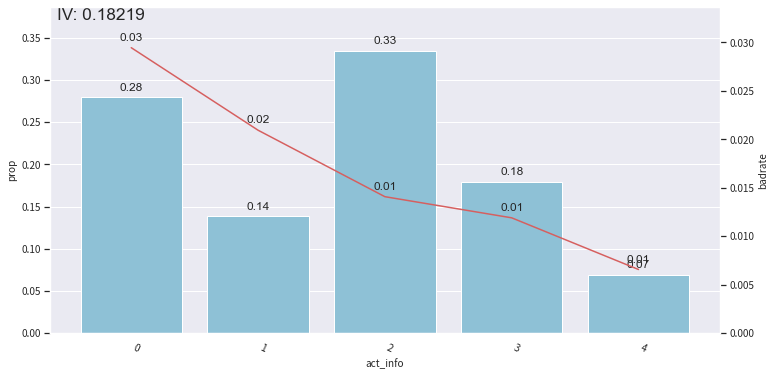

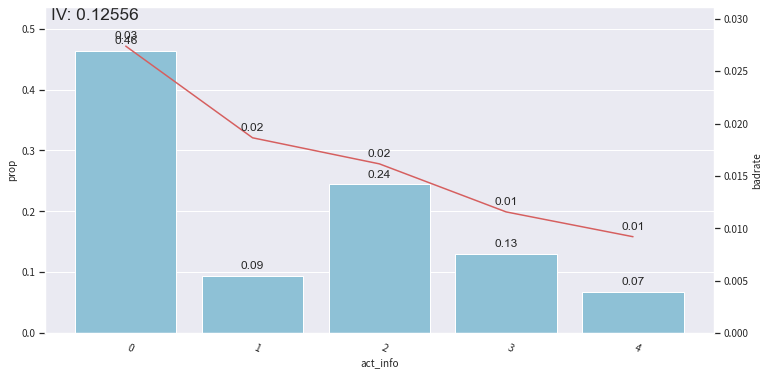

In [20]:
# 分箱后通过画图观察  
from toad.plot import  bin_plot, badrate_plot  
bin_plot(dev_slct2, x='act_info', target='bad_ind')  
bin_plot(val2, x='act_info', target='bad_ind')  

In [21]:
bins['person_info']

[-0.2610139784946237,
 -0.1286774193548387,
 -0.0537175627240143,
 0.013863440860215,
 0.0626602150537634,
 0.078853046594982]

In [22]:
#调整分箱
adj_bin = {'person_info': [-0.2610139784946237,
 -0.1286774193548387,
 -0.0537175627240143,
 0.078853046594982]}  
combiner.set_rules(adj_bin)

In [23]:
dev_slct3 = combiner.transform(dev_slct1)
val3 = combiner.transform(val[dev_slct1.columns])

<AxesSubplot:xlabel='person_info', ylabel='prop'>

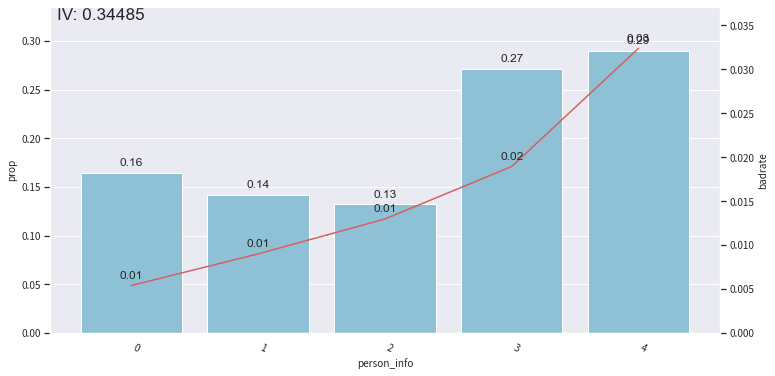

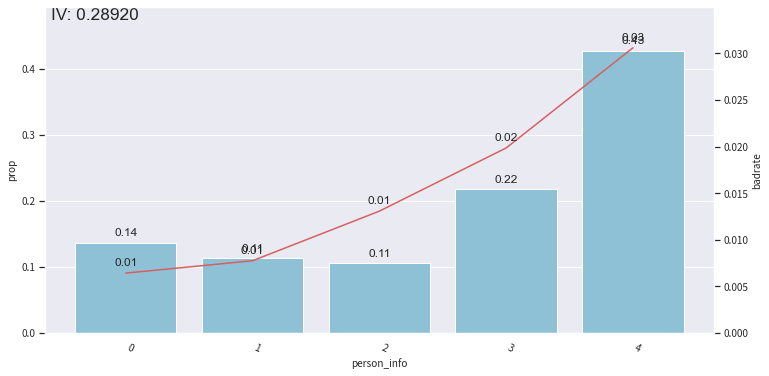

In [24]:
# 画出Bivar图

bin_plot(dev_slct3, x='person_info', target='bad_ind')
bin_plot(val3, x='person_info', target='bad_ind') 


- woe

In [49]:
t = toad.transform.WOETransformer()  
dev_slct3_woe = t.fit_transform(dev_slct3, dev_slct3['bad_ind'], 
                                      exclude=ex_lis) 
val_woe = t.transform(val3[dev_slct3.columns])  
data_woe = pd.concat([dev_slct3_woe, val_woe])

In [50]:
val_woe

,bad_ind,uid,td_score,jxl_score,mj_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info
79831,0.0,A10002345,0.001270,-0.013117,-0.017733,-0.012044,-0.010894,0.029003,1.182080,1.224399,-0.273001
79832,0.0,A10003755,0.001270,0.004548,-0.017733,0.015620,-0.010894,0.029003,-0.655991,-0.889894,-0.273001
79833,0.0,A1000756,-0.002622,0.004548,0.030837,0.015620,-0.010894,0.579142,-0.655991,-0.303132,-0.443627
79834,0.0,A100085,0.001270,0.004548,-0.017733,-0.012044,-0.010894,0.029003,1.182080,-0.303132,-1.043788
79835,0.0,A10008856,0.001270,0.004548,-0.017733,0.015620,-0.010894,0.029003,-0.655991,-0.889894,-0.273001
...,...,...,...,...,...,...,...,...,...,...,...
95801,0.0,Ab99_96436391998107976,-0.002622,0.004548,-0.017733,0.015620,-0.010894,0.579142,1.182080,1.224399,0.480941
95802,0.0,Ab99_96436391998176292,0.001270,0.004548,0.030837,0.015620,-0.010894,0.579142,-0.655991,-0.889894,0.480941
95803,0.0,Ab99_96436391998322771,-0.002622,0.004548,0.030837,0.015620,-0.010894,0.579142,-0.655991,-0.889894,0.480941
95804,0.0,Ab99_96436391998973383,0.001270,-0.013117,-0.017733,0.015620,-0.010894,0.579142,-0.655991,-0.303132,0.480941


- psi

In [51]:
psi_df = toad.metrics.PSI(dev_slct3_woe, val_woe).sort_values(0)  
psi_df = psi_df.reset_index()  
psi_df = psi_df.rename(columns = {'index': 'feature', 0: 'psi'})  

psi_013 = list(psi_df[psi_df.psi<0.16].feature)  

/var/folders/9k/xnn77fsj6vl6fbrh40vvlnhw0000gn/T/ipykernel_91593/1043212568.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  psi_df = toad.metrics.PSI(dev_slct3_woe, val_woe).sort_values(0)


In [52]:
len(psi_013)

11

In [53]:
psi_013

['uid',
 'td_score',
 'zzc_score',
 'mj_score',
 'zcx_score',
 'jxl_score',
 'bad_ind',
 'credit_info',
 'person_info',
 'finance_info',
 'act_info']

In [54]:
for i in ex_lis:  
    if i in psi_013:  
        pass  
    else:
        psi_013.append(i)   

In [55]:
data_woe = data_woe[psi_013]    
dev_woe_psi = dev_slct3_woe[psi_013] 
val_woe_psi = val_woe[psi_013] 
print(data_woe.shape)

(95806, 11)


- 逐步回归特征筛选

In [56]:
dev_woe_psi_stp = toad.selection.stepwise(dev_woe_psi,  
                                                  dev_woe_psi['bad_ind'],  
                                                  exclude=ex_lis,  
                                                  direction='both',   
                                                  criterion='aic',  
                                                  estimator='ols',
                                              intercept=False)  
val_woe_psi_stp = val_woe_psi[dev_woe_psi_stp.columns]  
data_woe = pd.concat([dev_woe_psi_stp, val_woe_psi_stp]) 
print(data_woe.shape)

(95806, 6)


In [57]:
data_woe.columns

Index(['uid', 'bad_ind', 'credit_info', 'person_info', 'finance_info',
       'act_info'],
      dtype='object')

In [58]:
feature_lst = ['person_info','finance_info','credit_info','act_info']

In [60]:
dev_woe_psi_stp

,uid,bad_ind,credit_info,person_info,finance_info,act_info
0,A10000005,0.0,-0.889894,-1.239790,-0.655991,-0.273001
1,A1000002,0.0,-0.889894,-0.355917,-0.655991,-0.443627
2,A1000011,0.0,0.763153,0.029003,-0.655991,-0.443627
3,A10000481,0.0,0.458753,0.579142,1.182080,-0.273001
4,A1000069,0.0,-0.889894,-0.724862,-0.655991,-0.443627
...,...,...,...,...,...,...
79826,Ab99_96436392005147255,0.0,0.763153,0.579142,1.182080,0.480941
79827,Ab99_96436392005205003,0.0,-0.889894,0.579142,-0.655991,0.480941
79828,Ab99_96436392005412387,0.0,-0.303132,0.579142,-0.655991,0.480941
79829,Ab99_96436392006241624,0.0,-0.889894,0.579142,-0.655991,0.480941


## 逻辑回归训练

In [154]:
X=dev_woe_psi_stp[feature_lst]
y=dev_woe_psi_stp['bad_ind']
vali_X=val_woe_psi_stp[feature_lst]
vali_y=val_woe_psi_stp['bad_ind']

c_1 = np.linspace(0.01,4,20)

In [62]:
lr = LR(solver='liblinear',C=0.1).fit(X,y)
y_pred = lr.predict_proba(vali_X)[:,1]  
fpr_val,tpr_val,_ = roc_curve(vali_y, y_pred)  
val_ks = abs(fpr_val - tpr_val).max()  
val_ks

0.4192873020153478

- 调参

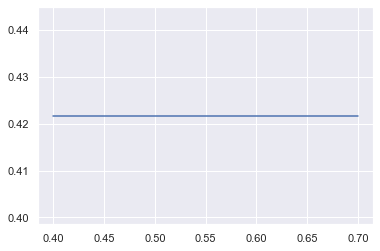

In [157]:
#参数C
c_2 = np.linspace(0.4,0.7,20)
ks = []
for i in c_2: 
    lr = LR(solver='liblinear',class_weight='balanced',C=i).fit(X,y)
    y_pred = lr.predict_proba(vali_X)[:,1]  
    fpr_val,tpr_val,_ = roc_curve(vali_y, y_pred)  
    val_ks = abs(fpr_val - tpr_val).max()  
    ks.append(val_ks)
    
plt.figure()
plt.plot(c_2,ks)
plt.show()

/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.p

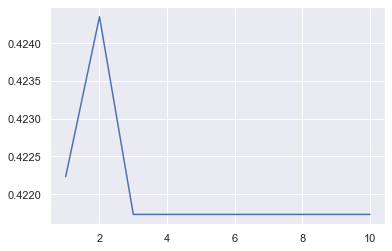

In [158]:
#参数max_iter
ks = []
for i in [1,2,3,4,5,6,10]: 
    lr = LR(solver='liblinear',class_weight='balanced',C=0.025,max_iter=i).fit(X,y)
    y_pred = lr.predict_proba(vali_X)[:,1]  
    fpr_val,tpr_val,_ = roc_curve(vali_y, y_pred)  
    val_ks = abs(fpr_val - tpr_val).max()  
    ks.append(val_ks)
plt.figure()
plt.plot([1,2,3,4,5,6,10],ks)
plt.show()

In [159]:
lr = LR(solver='liblinear',class_weight='balanced',C=0.52,max_iter=2).fit(X,y)

y_pred = lr.predict_proba(X)[:,1]  
fpr_dev,tpr_dev,_ = roc_curve(y, y_pred)  
train_ks = abs(fpr_dev - tpr_dev).max()  
print('train_ks : ', train_ks)  

y_pred = lr.predict_proba(vali_X)[:,1]  
fpr_val,tpr_val,_ = roc_curve(vali_y, y_pred)  
val_ks = abs(fpr_val - tpr_val).max()  
print('val_ks : ', val_ks)  


train_ks :  0.47683819357939317
val_ks :  0.4243523655278733


/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [168]:
print("训练集和测试集之间的KS相差:%.2f%%" % ((train_ks-val_ks)/val_ks*100))

训练集和测试集之间的KS相差:12.37%


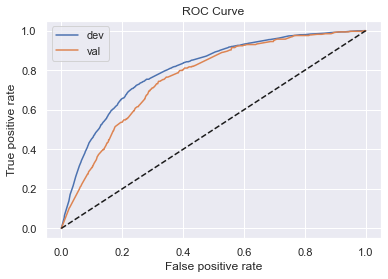

In [67]:
from matplotlib import pyplot as plt  
plt.plot(fpr_dev, tpr_dev, label='dev')  
plt.plot(fpr_val, tpr_val, label='val')  
plt.plot([0,1], [0,1], 'k--')  
plt.xlabel('False positive rate')  
plt.ylabel('True positive rate')  
plt.title('ROC Curve')  
plt.legend(loc='best')  
plt.show()

## 使用solation Forest做异常值检测

,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info,samp_type
0,0.0,A1000002,0.825269,0.398688,0.139396,0.843725,0.605194,0.406122,-0.128677,0.023810,0.00,0.423077,dev
1,0.0,A1000011,0.315406,0.629745,0.535854,0.197392,0.614416,0.320731,0.062660,0.023810,0.10,0.448718,dev
2,0.0,A10000481,0.002386,0.609360,0.366081,0.342243,0.870006,0.288692,0.078853,0.071429,0.05,0.179487,dev
3,0.0,A1000069,0.406310,0.405352,0.783015,0.563953,0.715454,0.512554,-0.261014,0.023810,0.00,0.423077,dev
4,0.0,A10001225,0.919365,0.783020,0.033548,0.129552,0.544368,0.137676,0.013863,0.023810,0.50,0.166667,dev
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95801,0.0,Ab99_96436391998107976,0.890233,0.442687,0.802687,0.776982,0.638971,0.605522,0.078853,0.142857,0.25,0.076923,off
95802,0.0,Ab99_96436391998176292,0.161840,0.495766,0.085750,0.536738,0.596144,0.132972,0.078853,0.023810,0.00,0.076923,off
95803,0.0,Ab99_96436391998322771,0.746522,0.732739,0.025475,0.831805,0.642904,0.029297,0.078853,0.023810,0.00,0.076923,off
95804,0.0,Ab99_96436391998973383,0.176846,0.749610,0.933879,0.506921,0.867099,0.751643,0.078853,0.023810,0.02,0.076923,off


In [70]:
from pyod.models.iforest import IForest

In [71]:
clf = IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
                max_samples='auto', n_estimators=500, n_jobs=-1, random_state=None,verbose=0)
clf.fit(X)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=500, n_jobs=-1, random_state=None,
    verbose=0)

In [72]:
out_pred = clf.predict_proba(X,method ='linear')[:,1]

/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [73]:
len(out_pred)

79831

In [74]:
dev['out_pred'] = out_pred

In [99]:
dev

,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info,out_pred,for_pred
0,0.0,A10000005,0.675349,0.144072,0.186899,0.483640,0.928328,0.369644,-0.322581,0.023810,0.00,0.217949,0.183799,0
1,0.0,A1000002,0.825269,0.398688,0.139396,0.843725,0.605194,0.406122,-0.128677,0.023810,0.00,0.423077,0.178267,0
2,0.0,A1000011,0.315406,0.629745,0.535854,0.197392,0.614416,0.320731,0.062660,0.023810,0.10,0.448718,0.379355,0
3,0.0,A10000481,0.002386,0.609360,0.366081,0.342243,0.870006,0.288692,0.078853,0.071429,0.05,0.179487,0.586768,0
4,0.0,A1000069,0.406310,0.405352,0.783015,0.563953,0.715454,0.512554,-0.261014,0.023810,0.00,0.423077,0.215857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79826,0.0,Ab99_96436392005147255,0.905578,0.927706,0.994447,0.315842,0.959443,0.042640,0.078853,0.071429,0.13,0.076923,0.441979,0
79827,0.0,Ab99_96436392005205003,0.639265,0.219267,0.845014,0.751332,0.275557,0.902642,0.078853,0.023810,0.00,0.076923,0.187403,0
79828,0.0,Ab99_96436392005412387,0.355061,0.837747,0.931882,0.442463,0.579277,0.740754,0.078853,0.023810,0.02,0.076923,0.430869,0
79829,0.0,Ab99_96436392006241624,0.797237,0.501238,0.490850,0.592068,0.479618,0.859870,0.078853,0.023810,0.00,0.076923,0.187403,0


In [96]:
dev['for_pred'] = np.where(dev.out_pred>0.7,1,0)

In [103]:
dev[dev['for_pred']==dev['bad_ind']]

,bad_ind,uid,td_score,jxl_score,mj_score,rh_score,zzc_score,zcx_score,person_info,finance_info,credit_info,act_info,out_pred,for_pred
0,0.0,A10000005,0.675349,0.144072,0.186899,0.483640,0.928328,0.369644,-0.322581,0.023810,0.00,0.217949,0.183799,0
1,0.0,A1000002,0.825269,0.398688,0.139396,0.843725,0.605194,0.406122,-0.128677,0.023810,0.00,0.423077,0.178267,0
2,0.0,A1000011,0.315406,0.629745,0.535854,0.197392,0.614416,0.320731,0.062660,0.023810,0.10,0.448718,0.379355,0
3,0.0,A10000481,0.002386,0.609360,0.366081,0.342243,0.870006,0.288692,0.078853,0.071429,0.05,0.179487,0.586768,0
4,0.0,A1000069,0.406310,0.405352,0.783015,0.563953,0.715454,0.512554,-0.261014,0.023810,0.00,0.423077,0.215857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79826,0.0,Ab99_96436392005147255,0.905578,0.927706,0.994447,0.315842,0.959443,0.042640,0.078853,0.071429,0.13,0.076923,0.441979,0
79827,0.0,Ab99_96436392005205003,0.639265,0.219267,0.845014,0.751332,0.275557,0.902642,0.078853,0.023810,0.00,0.076923,0.187403,0
79828,0.0,Ab99_96436392005412387,0.355061,0.837747,0.931882,0.442463,0.579277,0.740754,0.078853,0.023810,0.02,0.076923,0.430869,0
79829,0.0,Ab99_96436392006241624,0.797237,0.501238,0.490850,0.592068,0.479618,0.859870,0.078853,0.023810,0.00,0.076923,0.187403,0


In [104]:
72584/79831

0.909220728789568

In [97]:
dev.for_pred.groupby(dev.bad_ind).sum()/dev.for_pred.groupby(dev.bad_ind).count()

bad_ind
0.0    0.076313
1.0    0.138095
Name: for_pred, dtype: float64

In [185]:
x = dev[dev.out_pred< 0.65][feature_lst]
y = dev[dev.out_pred < 0.65]['bad_ind']

val_x =  val[feature_lst]
val_y = val['bad_ind']

train_ks :  0.4361835834472343
val_ks :  0.41981650811267485


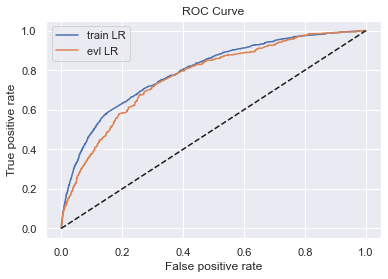

In [122]:
lr_model = LR(C=0.1,class_weight='balanced')
lr_model.fit(x,y)
y_pred = lr_model.predict_proba(x)[:,1]
fpr_lr_train,tpr_lr_train,_ = roc_curve(y,y_pred)
train_ks = abs(fpr_lr_train - tpr_lr_train).max()
print('train_ks : ',train_ks)

y_pred = lr_model.predict_proba(val_x)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(val_y,y_pred)
val_ks = abs(fpr_lr - tpr_lr).max()
print('val_ks : ',val_ks)
from matplotlib import pyplot as plt
plt.plot(fpr_lr_train,tpr_lr_train,label = 'train LR')
plt.plot(fpr_lr,tpr_lr,label = 'evl LR')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

In [123]:
(0.4361835834472343-0.41981650811267485)/0.41981650811267485

0.038986259516423476

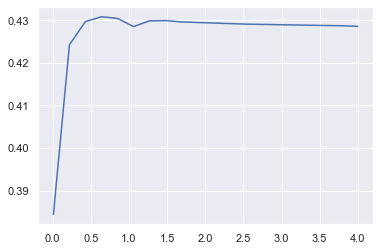

In [129]:
#参数C
ks = []
for i in c_1: 
    lr = LR(solver='liblinear',class_weight='balanced',C=i).fit(x,y)
    y_pred = lr.predict_proba(val_x)[:,1]  
    fpr_val,tpr_val,_ = roc_curve(val_y, y_pred)  
    val_ks = abs(fpr_val - tpr_val).max()  
    ks.append(val_ks)
    
plt.figure()
plt.plot(c_1,ks)
plt.show()

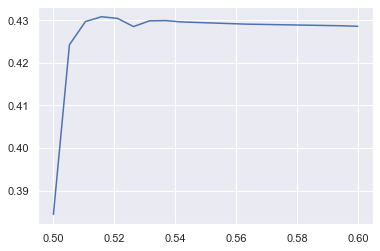

In [131]:
#参数C
c_2=np.linspace(0.5,0.6,20)

ks = []
for i in c_1: 
    lr = LR(solver='liblinear',class_weight='balanced',C=i).fit(x,y)
    y_pred = lr.predict_proba(val_x)[:,1]  
    fpr_val,tpr_val,_ = roc_curve(val_y, y_pred)  
    val_ks = abs(fpr_val - tpr_val).max()  
    ks.append(val_ks)
    
plt.figure()
plt.plot(c_2,ks)
plt.show()

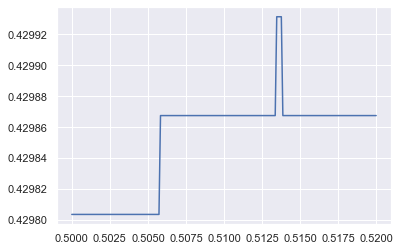

In [138]:
c_3=np.linspace(0.5,0.52,200)
ks = []
for i in c_3: 
    lr = LR(solver='liblinear',class_weight='balanced',C=i).fit(x,y)
    y_pred = lr.predict_proba(val_x)[:,1]  
    fpr_val,tpr_val,_ = roc_curve(val_y, y_pred)  
    val_ks = abs(fpr_val - tpr_val).max()  
    ks.append(val_ks)
    
plt.figure()
plt.plot(c_3,ks)
plt.show()

/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.p

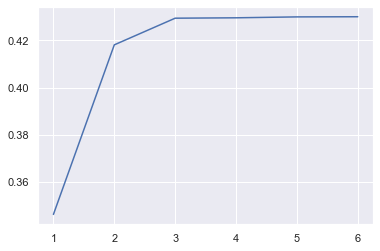

In [133]:
#参数max_iter
ks = []
for i in [1,2,3,4,5,6]: 
    lr = LR(solver='liblinear',class_weight='balanced',C=0.5135,max_iter=i).fit(x,y)
    y_pred = lr.predict_proba(val_x)[:,1]  
    fpr_val,tpr_val,_ = roc_curve(val_y, y_pred)  
    val_ks = abs(fpr_val - tpr_val).max()  
    ks.append(val_ks)
plt.figure()
plt.plot([1,2,3,4,5,6],ks)
plt.show()

/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


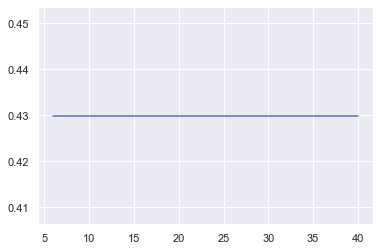

In [142]:
#参数max_iter
ks = []
for i in [6,7,8,9,10,20,30,40]: 
    lr = LR(solver='liblinear',class_weight='balanced',C=0.5135,max_iter=i).fit(x,y)
    y_pred = lr.predict_proba(val_x)[:,1]  
    fpr_val,tpr_val,_ = roc_curve(val_y, y_pred)  
    val_ks = abs(fpr_val - tpr_val).max()  
    ks.append(val_ks)
plt.figure()
plt.plot([6,7,8,9,10,20,30,40],ks)
plt.show()

train_ks :  0.44215090060006956
val_ks :  0.4299314370244744


/Users/limeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


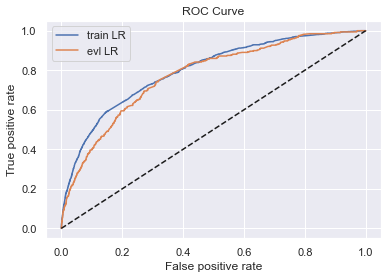

In [186]:
lr = LR(solver='liblinear',class_weight='balanced',C=0.5135,max_iter=6).fit(x,y)
#lr = LR(solver='liblinear',class_weight='balanced',C=0.5135).fit(x,y)

y_pred = lr.predict_proba(x)[:,1]
fpr_lr_train,tpr_lr_train,_ = roc_curve(y,y_pred)
train_ks = abs(fpr_lr_train - tpr_lr_train).max()
print('train_ks : ',train_ks)

y_pred = lr.predict_proba(val_x)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(val_y,y_pred)
val_ks = abs(fpr_lr - tpr_lr).max()
print('val_ks : ',val_ks)
from matplotlib import pyplot as plt
plt.plot(fpr_lr_train,tpr_lr_train,label = 'train LR')
plt.plot(fpr_lr,tpr_lr,label = 'evl LR')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc = 'best')
plt.show()

In [135]:
(0.44215090060006956-0.4299314370244744)/0.4299314370244744*100

2.842188898807965

In [144]:
train_auc=auc(fpr_lr_train, tpr_lr_train)
print('train_auc:',train_auc)

val_auc=auc(fpr_lr,tpr_lr)
print('val_auc:',val_auc)

train_auc: 0.7967288373511014
val_auc: 0.7731179864604296


## 最终结果

In [187]:
print("train_ks:%.3f" %(train_ks),"\n",
      "val_ks:%.3f" %(val_ks),"\n",
      "训练集和测试集之间的KS相差%.2f%%:"% ((train_ks-val_ks)/val_ks*100))

train_ks:0.442 
 val_ks:0.430 
 训练集和测试集之间的KS相差2.84%:
